In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
from app.drivers import CameraDriver as CD
from app.drivers import JenaDriver, KDC101
from app.drivers import ZaberDriver

In [3]:
# exposure time is in microseconds
camera = CD({'exposure_time':500000})

In [4]:
# initialise and start camera
camera.initialise()
camera.start_acquisition()

In [25]:
# # define the piezo driver
# Note: if the Jena is not connecting, then it can be reset with a switch on the back
z_fine = JenaDriver('/dev/ttyUSB3', 'z_fine')

# initialise the piezo
z_fine.initialise({})

In [6]:
# Z coarse for the zaber driver
z_coarse = ZaberDriver('/dev/ttyUSB9', 'z_coarse')

z_coarse.initialise(config_dict={})

In [15]:
# shutter driver
idler_shut = KDC101('/dev/ttyUSB5', 'idler_shutter', tol=1e-4)

# initialise the shutter
idler_shut.initialise({})

## Testing

In [9]:
z_fine.get_position()

0.0

In [8]:
z_fine.set_parameters(0.0)

In [16]:
idler_shut.get_position()

0.0

In [13]:
idler_shut.set_parameters(-3e-3)

In [9]:
z_coarse.get_position()

15.520035000000016

In [33]:
z_curr=15.52

In [74]:
z_curr=z_curr-0.01
z_coarse.set_parameters(z_curr)
print(z_curr)

15.210000000000006


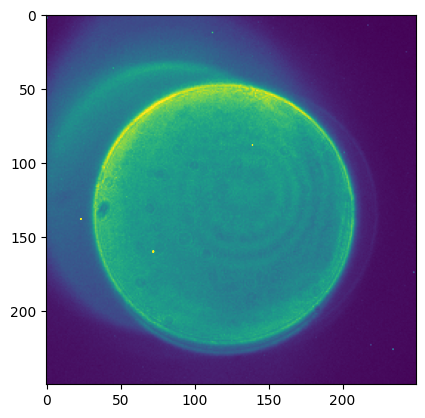

In [5]:
test_img = np.array(camera.get_image(), dtype=np.float32)
plt.imshow(test_img, vmax=1200)
plt.show()

# Data acquisition

## Fringe Image

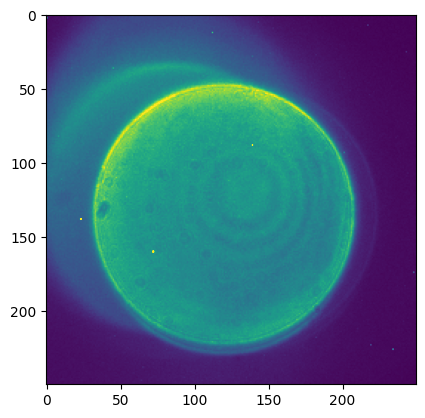

In [14]:
dark_fringe_img = np.array(camera.get_image(), dtype=np.float32)
plt.imshow(dark_img, vmax=1200)
plt.show()

## Dark Image

In [14]:
idler_shut.get_position()

-0.003000204057835821

In [17]:
# drive forward and acquire and image
idler_shut.set_parameters(15e-3)
dark_img = np.array(camera.get_image(), dtype=np.float32)
idler_shut.set_parameters(0e-3)

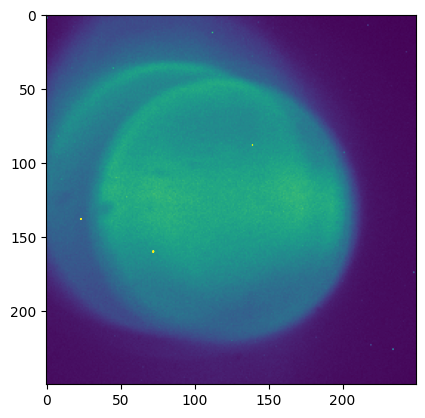

In [18]:
plt.imshow(dark_img, vmax=1200)
plt.show()

## Bright image 

In [36]:
img_list = []
piezo_posns = []
_step_size = 0.05
for step in np.arange(0, 3.5, _step_size):
    print(f'Jena stepping: {np.round(step, 3)}...', end='')
    z_fine.set_parameters(step)
    print('Done')
    new_img = np.array(camera.get_image(), dtype=np.float32)
    img_list.append(new_img)
    piezo_posns.append(step)

Jena stepping: 0.0...Done
Jena stepping: 0.05...Done
Jena stepping: 0.1...Done
Jena stepping: 0.15...Done
Jena stepping: 0.2...Done
Jena stepping: 0.25...Done
Jena stepping: 0.3...Done
Jena stepping: 0.35...Done
Jena stepping: 0.4...Done
Jena stepping: 0.45...Done
Jena stepping: 0.5...Done
Jena stepping: 0.55...Done
Jena stepping: 0.6...Done
Jena stepping: 0.65...Done
Jena stepping: 0.7...Done
Jena stepping: 0.75...Done
Jena stepping: 0.8...Done
Jena stepping: 0.85...Done
Jena stepping: 0.9...Done
Jena stepping: 0.95...Done
Jena stepping: 1.0...Done
Jena stepping: 1.05...Done
Jena stepping: 1.1...Done
Jena stepping: 1.15...Done
Jena stepping: 1.2...Done
Jena stepping: 1.25...Done
Jena stepping: 1.3...Done
Jena stepping: 1.35...Done
Jena stepping: 1.4...Done
Jena stepping: 1.45...Done
Jena stepping: 1.5...Done
Jena stepping: 1.55...Done
Jena stepping: 1.6...Done
Jena stepping: 1.65...Done
Jena stepping: 1.7...Done
Jena stepping: 1.75...Done
Jena stepping: 1.8...Done
Jena stepping: 1.85.

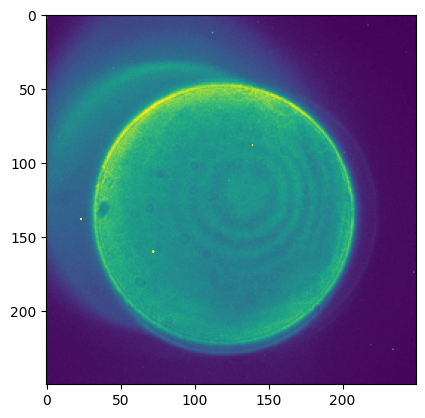

In [31]:
plt.imshow(img_list[-5], vmax=1200)
plt.show()

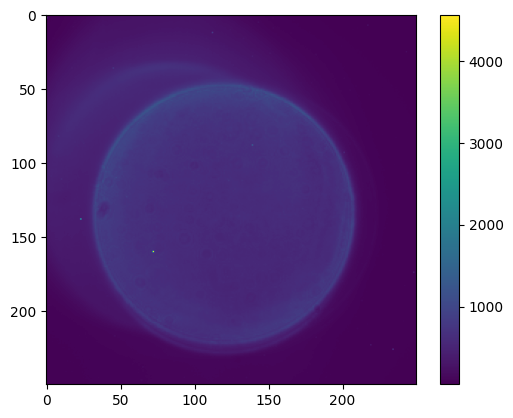

In [42]:
img_arr = np.array(img_list)
dark_diff = img_arr - dark_img
plt.imshow(np.mean(img_arr, axis=0))
# plt.imshow(dark_diff[0])
plt.colorbar()
plt.show()


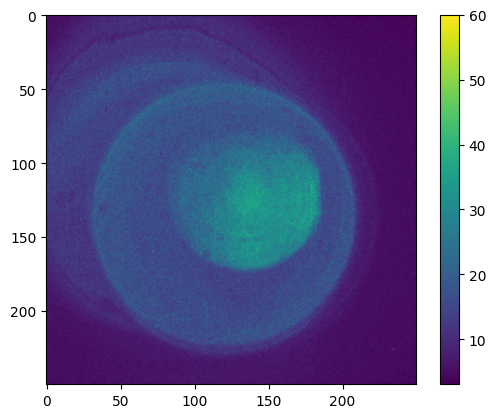

In [43]:
img_arr = np.array(img_list)
dark_diff = img_arr - dark_img
plt.imshow(np.std(img_arr, axis=0),vmax=60)
# plt.imshow(dark_diff[0])
plt.colorbar()
plt.show()

# plt.plot(img_arr[:, 125, 125])
# plt.plot(img_arr[:, 100, 125])
# plt.show()

# plt.imshow(img_arr[0])
# plt.colorbar()
# plt.show()

## Save data

In [47]:
_DIRECTORY = './data/droptest/'
_FILENAME = 'none.h5'
data_file = h5py.File(_DIRECTORY + _FILENAME, 'w')

In [48]:
# create a dataset
img_arr = np.array(img_list)
data_file.create_dataset('img_data', data=img_arr)
data_file.create_dataset('piezo_steps', data=piezo_posns)
data_file.create_dataset('dark_img', data=dark_img)
data_file.create_dataset('dark_fringe_img', data=dark_fringe_img)

<HDF5 dataset "dark_fringe_img": shape (250, 250), type "<f4">

In [49]:
data_file.attrs['acquisition_date'] = str(datetime.datetime.now())
data_file.attrs['exposure_time'] = 500000
data_file.attrs['temperature'] = 80
# "slide", "edge", "centre"
data_file.attrs['item'] = "slide"

In [50]:
data_file.close()

## Read data

In [51]:
# open the data file
data_file = h5py.File(_DIRECTORY + _FILENAME, 'r')

<KeysViewHDF5 ['dark_fringe_img', 'dark_img', 'img_data', 'piezo_steps']>


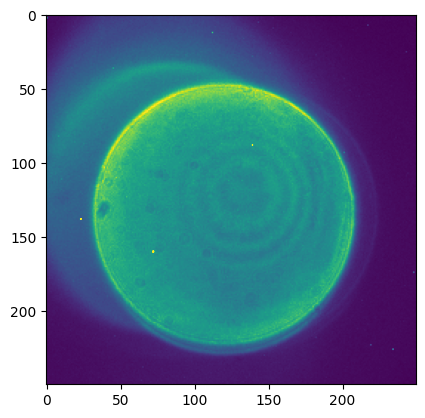

In [53]:
# look at the keys in the data file and extraxt an image to plot
print(data_file.keys())
img_arr = np.array(data_file['img_data'])

plt.imshow(img_arr[50], vmax=1200)
plt.show()

In [54]:
data_file.close()

# Finish

In [55]:
camera.shutdown()

In [57]:
z_fine.shutdown()

In [59]:
idler_shut.shutdown()

In [112]:
dark_img

array([[ 45.,  45.,  45., ...,  30.,  30.,  33.],
       [ 42.,  39.,  39., ...,  30.,  30.,  27.],
       [939.,  48.,  36., ...,  27.,  24.,  30.],
       ...,
       [ 39.,  36.,  45., ...,  36.,  42.,  27.],
       [ 36.,  39.,  45., ...,  27.,  27.,  30.],
       [ 39.,  33.,  39., ...,  27.,  27.,  30.]], dtype=float32)

194.08356


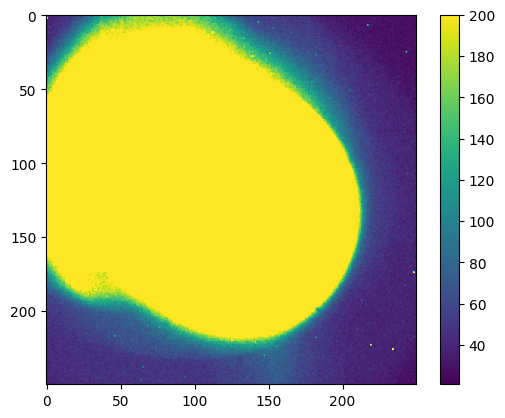

In [114]:
img_arr = np.array(img_list)
dark_diff = img_arr - dark_img
plt.imshow((dark_img),vmax=200)
# plt.imshow(dark_diff[0])
print(np.std(dark_img))
plt.colorbar()
plt.show()